# DATA ANALYSIS PROJECT

In [81]:
pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [29]:
d = pd.read_csv('Details.csv') 
d.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [79]:
headers = ["symboling", "normalized-losses", "make", 
           "fuel-type", "aspiration","number-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","number-of-cylinders", "engine-size", 
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
  
d.columns=headers
d.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450


In [31]:
details = d
  
# Finding the missing values
details.isna().any()
  
# Finding if missing values 
details.isnull().any() 

symboling              False
normalized-losses      False
make                   False
fuel-type              False
aspiration             False
number-of-doors        False
body-style             False
drive-wheels           False
engine-location        False
wheel-base             False
length                 False
width                  False
height                 False
curb-weight            False
engine-type            False
number-of-cylinders    False
engine-size            False
fuel-system            False
bore                   False
stroke                 False
compression-ratio      False
horsepower             False
peak-rpm               False
city-mpg               False
highway-mpg            False
price                  False
dtype: bool

In [46]:
# converting mpg to L / 100km
details['city-mpg'] = 235 / d['city-mpg']
details.rename(columns = {'city_mpg': "city-L / 100km"}, inplace = True)
  
print(details.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'number-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'number-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price-binned'],
      dtype='object')


In [47]:
# checking the data type of each column
details.dtypes 

symboling                 int64
normalized-losses        object
make                     object
fuel-type                object
aspiration               object
number-of-doors          object
body-style               object
drive-wheels             object
engine-location          object
wheel-base              float64
length                  float64
width                   float64
height                  float64
curb-weight               int64
engine-type              object
number-of-cylinders      object
engine-size               int64
fuel-system              object
bore                     object
stroke                   object
compression-ratio       float64
horsepower               object
peak-rpm                 object
city-mpg                float64
highway-mpg               int64
price                     int32
price-binned           category
dtype: object

In [33]:
details.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [36]:
# Here it contains '?', so we Drop it
details = details[details.price != '?']

details['price'] = details['price'].astype(int)
# checking it again
details.dtypes

symboling                int64
normalized-losses       object
make                    object
fuel-type               object
aspiration              object
number-of-doors         object
body-style              object
drive-wheels            object
engine-location         object
wheel-base             float64
length                 float64
width                  float64
height                 float64
curb-weight              int64
engine-type             object
number-of-cylinders     object
engine-size              int64
fuel-system             object
bore                    object
stroke                  object
compression-ratio      float64
horsepower              object
peak-rpm                object
city-mpg               float64
highway-mpg              int64
price                    int32
dtype: object

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 201, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


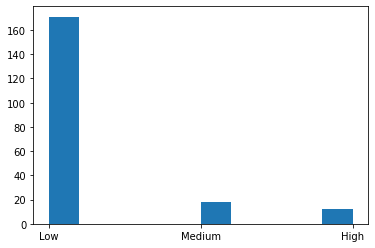

In [37]:
details['length'] = details['length']/details['length'].max()
details['width'] = details['width']/details['width'].max()
details['height'] = details['height']/details['height'].max()
  
# binning- grouping values
bins = np.linspace(min(details['price']), max(details['price']), 4) 
group_names = ['Low', 'Medium', 'High']
details['price-binned'] = pd.cut(details['price'], bins, 
                              labels = group_names, 
                              include_lowest = True)
  
print(details['price-binned'])
plt.hist(details['price-binned'])
plt.show()

In [76]:
# categorical to numerical variables
pd.get_dummies(details['fuel-type']).head()


,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [55]:
details.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


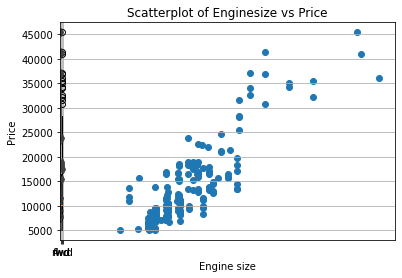

In [71]:

plt.boxplot(details['price'])
  
# by using seaborna
sns.boxplot(x ='drive-wheels', y ='price', data = details, palette="Oranges_r")
  
# Predicting price based on engine size
# Known on x and predictable on y
plt.scatter(details['engine-size'], details['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [56]:
# Grouping Data
t = details[['drive-wheels', 'body-style', 'price']]
details_grp = t.groupby(['drive-wheels', 'body-style'], 
                         as_index = False).mean()
  
details_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [57]:
# pivot method
details_pivot = details_grp.pivot(index = 'drive-wheels',
                            columns = 'body-style')
details_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

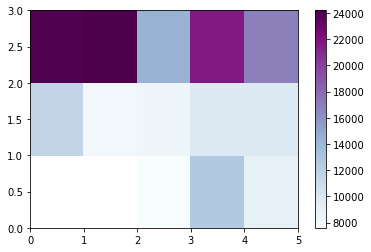

In [77]:
# heatmap for visualizing data
plt.pcolor(details_pivot, cmap ='BuPu')
plt.colorbar()
plt.show()

In [42]:
# Analysis of Variance- ANOVA
# returns f-test and p-value
# f-test = variance between sample group means divided by 
# variation within sample group
# p-value = confidence degree
details_annova = details[['make', 'price']]
grouped_annova = details_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
                             grouped_annova.get_group('honda')['price'],
                             grouped_annova.get_group('subaru')['price']
                                    )
print(annova_results_l)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53125.12243980549)

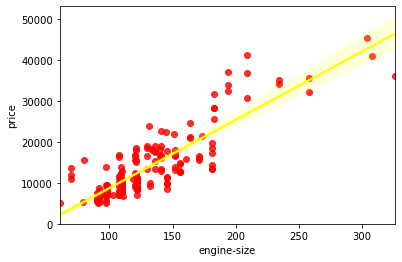

In [61]:
# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value
  
# Correlation- measures dependency, not causation
sns.regplot(x ='engine-size', y ='price', data = details, scatter_kws={"color": "red"}, line_kws={"color": "yellow"})

plt.ylim(0, )